# Tutorial Feb 1st

In [69]:
cd(joinpath(pwd(),".."))

using Pkg
Pkg.activate(".")

  Activating new project at `c:\Users\steve\Documents`


In [70]:
using LinearAlgebra

Consider the system of equations given by 
$$ A x = b $$ 

For example, we let $A = \Pi'$, $x = \gamma_1$, and $b = \pi'$. 


Denote $A^{\dagger}$ as the pseudo-inverse of $A$. The properties of the pseudo-inverse are

1. $A A^{\dagger} A = A$. 
2. $A^{\dagger} A A^{\dagger} = A^{\dagger}$.
3. $A^{\dagger} A$ is symmetric.
4. $A A^{\dagger}$ is symmetric.

We say $A^{\dagger}$ is a Generalized Inverse when 1 holds. When 1 and 2 hold, we say it's a Reflexive Generalized Inverse. Moreover, $A^{\dagger}$ always exists for any matrix $A$.In the case where $A$ has full column rank, then 

$$ A^{\dagger} = (A'A)^{-1} A'$$

In [71]:
using Random
Random.seed!(1234);

## Example of MP Inverse

In [72]:
y = [3.0;6.0]
X = [1 2; 2 4]

b = pinv(X)*y

2-element Vector{Float64}:
 0.5999999999999999
 1.1999999999999997

In [73]:
using Plots
gr(fmt=:png);

ArgumentError: ArgumentError: Package Plots not found in current path, maybe you meant `import/using .Plots`.
- Otherwise, run `import Pkg; Pkg.add("Plots")` to install the Plots package.

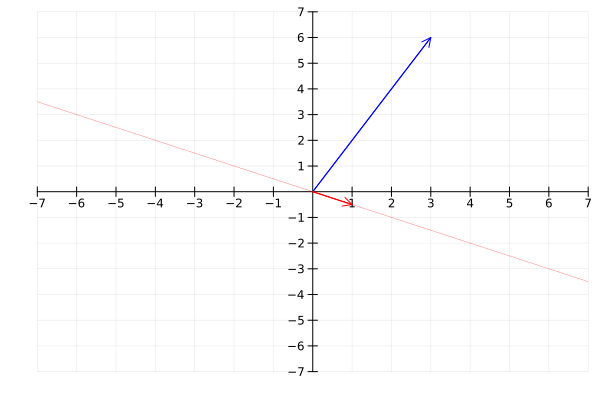

In [74]:
r1 = range(-7,7, length=10)
r2 = -r1/2
r3 = -r1/2 .+ 1.5
#x_vals = [0 0 ; b[1] y[1]]
#y_vals = [0 0 ; b[2] y[2]]

plot([0, y[1]], [0, y[2]], arrow = true, color = :blue,
     legend = :none, xlims = (-7, 7), ylims = (-7, 7),
     xticks = -7:1:7, yticks = -7:1:7,
     framestyle = :origin)
plot!([0 , 1], [0 , -0.5], arrow = true, color = :red)
plot!(r1, r2, color = :red, lw = 0.4, alpha = 0.6)

Notice that the solution to the homogeneous system of linear equations 
$$A x = 0$$

is $$x = (I - A^{\dagger} A) q$$ 

where $q$ is an arbitrary vector. This subspace is shown as the red line above.


The general solution to $Ax = b$ takes the following form

$ x = A^{\dagger}b + (I - A^{\dagger} A) q$.

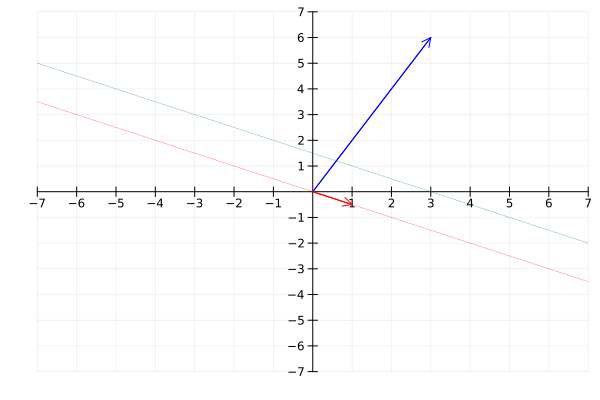

In [75]:
plot!(r1, r3, color = :green, lw = 0.4, alpha = 0.6) 

The MP inverse is unique, i.e., it returns a unique vector living in the subspace given by the green line.

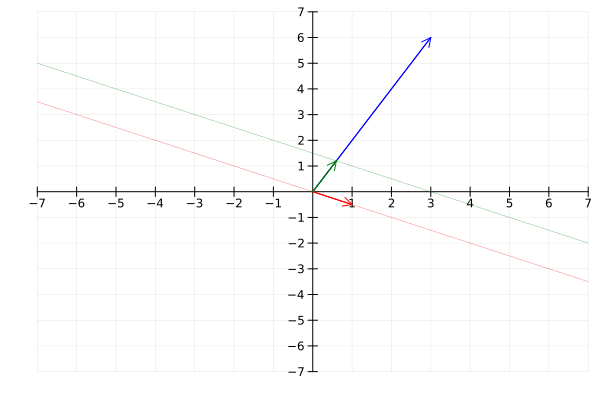

In [76]:
plot!([0 , b[1]], [0 , b[2]], arrow = true, color = :green)

## Exact Identification 

Consider the case where $A$ is an $l\times k$ matrix with full column rank, and $l=k$.

$$ A x = b $$

For example, $A:=Z'X$ and $b:=Z'y$. The solution is given by $x = A^{-1} b$.

## Overidentification

Now consider the case where $l>k$. Let $W$ be a positive definite and symmetric matrix.  Then we can write

$$ W^{1/2} A x = W^{1/2} b$$ 
$$ A' W^{1/2} W^{1/2} A x = A' W^{1/2}  W^{1/2} b$$ 
$$ A' W A x = A' W b$$ 

Now $A' W A $ is a square matrix with full rank $k$, so we can invert it. Then

$$x = (A' W A)^{-1} A' W b$$

where $A^{g} = (A' W A)^{-1} A'W$.


We'll see the conditions we need so that the generalized inverse $A^g$ is a MP inverse of $A$.  Let's check the four rules that any generalized inverse must satisfy.

1. $A A^g A = A (A'WA)^{-1} A'W A = A$
2. $A^g A A^g = (A'WA)^{-1} A'WA (A'WA)^{-1} A'W = A^g$
3. $A^g A$ must be symmetric, which is the case since it equals the identity matrix.
4. $AA^g$ must be symmetric. Notice that the following equation only holds if $W=I$.

$$ A(A'WA)^{-1}A'W= W'A (A'WA)^{-1} A'$$


Hence, the MP inverse of $A$ iss given by

$A^{\dagger} = (A'A)^{-1} A'$.

Another useful thing to keep in mind is that if $X$ has full column rank, then so does $X'X$. To see this, consider some $z \in N(X)$, i.e., $X z = 0$.  Then, notice that $X'X z = 0$ as well. This implies that $N(X) \subseteq N(X'X)$. 

Similarly, take some $w \in N(X'X)$, i.e., $X'X w=0$. Then we can see that $w' X'X w = 0$, so it follows that $Xw =0$. This implies that $N(X'X) \subseteq N(X)$.  

Finally, $N(X) = N(X'X)$ so the result follows by the rank nullity theorem.

# More Julia Stuff

## Going from summation to matrices

Let $Z_i$ be a vector of size $l$, and $u_i$ be a scalar. Let  $$\hat{\Omega} = \frac{1}{n} \sum_{i=1}^n u_i^2 Z_i Z_i'$$


We can rewrite

$$
\begin{align}
\hat{\Omega} &= \frac{1}{n} \sum_{i=1}^n (u_i Z_i) (u_i Z_i)' \\
&= \frac{1}{n} \sum_{i=1}^n \tilde{Z}_i \tilde{Z}_i' \\
&= \frac{1}{n}\tilde{Z}' \tilde{Z}
\end{align}
$$

so in Julia we can use the original matrix $Z$ and redefine

$$
\begin{align}
\tilde{Z} &= \left( \begin{array}{c}  Z_1' \times u_1 \\ \vdots \\ Z_n' \times u_n  \end{array} \right) \\
&= \left( \begin{array}{c}  Z_1' \\ \vdots \\ Z_n'  \end{array} \right) .^* u \\
&= Z .^* u
\end{align}
$$

In other words, we can just broadcast this operation instead of doing a loop!

## Generate some DGPs

This is just to show that you should be careful about the object types when you simulate your data generating process. To work with linear algebra stuff in Julia we need the elements of our Arrays to be numbers (Int, Float, etc.). 

In [77]:
using Distributions
W = rand(Uniform(0,1),10);

ArgumentError: ArgumentError: Package Distributions not found in current path, maybe you meant `import/using .Distributions`.
- Otherwise, run `import Pkg; Pkg.add("Distributions")` to install the Distributions package.

In [78]:
W.<0.2

false

In [79]:
1*(W.<0.2)

0

In [80]:
W.==0.1

false

In [81]:
1*(W.==0.1)

0

## About Functions

In [82]:
function f1()
    w =5 
    z= 6
    return  w,  z
end

f1 (generic function with 1 method)

In [83]:
z , W = f1()

(5, 6)

In [84]:
function f2()
    w =5 
    z= 6
    return (w = w ,z = z)
end

f2 (generic function with 1 method)

In [85]:
using Parameters
@unpack z , w = f2()


ArgumentError: ArgumentError: Package Parameters not found in current path, maybe you meant `import/using .Parameters`.
- Otherwise, run `import Pkg; Pkg.add("Parameters")` to install the Parameters package.

In [86]:
w

5

# Solving Linear Systems of Equations

Usually our moment conditions leave us with something that looks like a linear system of equations.  For instance, in the case of OLS we have the following system: 

$$ X'X * \beta  = X'Y $$

which can be rewritten as 

$$ A x  = b $$ 


We say a matrix is **ill-conditioned** if the basis of eigenvectors are close to, but not exactly, collinear. This can create numerical errors roughly in proportion to the base-10 log of the condition number. I don't think this is gonna be an issue in any of the computations you will perform in the course, but these type of issues can arise when we are, for instance, running models with many fixed effects (high dimensional FE). 


The condition number (using the 2-norm) can be computed as 

$$ k(A) = || A || * || A^{-1} || $$

In [87]:
#Create ill-conditioned matrix
ϵ = 1E-6
A = [1.0 0.0
     1.0 ϵ]
cond(A)

2.0000000000005004e6

In [88]:
#Notice that it has both huge and tiny values!
inv(A)

2×2 Matrix{Float64}:
  1.0    0.0
 -1.0e6  1.0e6

This is actually one of the reasons to avoid using `inv()` in practice, and instead use the backslash notation, which will perform better. Another reason is that if the A matrix is sparse, we make it dense when we invert it. The backslash notation will exploit the fact that A was sparse in the first place!

### Factorization

One way to fix this is to do a factorization, which will allow us to compute a more stable inverse (like a triangular matrix). For instance, a QR decomposition splits A into an orthogonal matrix (inverse = transpose) and an upper triangular matrix. The solution is then simplified as

$$ Q R x  = b $$ 
$$ R x  = Q^{T} * b $$
$$ x = R^{-1}  Q^{T} * b $$

In [89]:
illX = [ones(1000)'; ϵ * I]'
illXX = illX'illX;
illXY = illX' * rand(1000,1);

Q, R = qr(illXX);
βsol_qr = R \ (Q'* illXY)


1001×1 Matrix{Float64}:
     -0.15569752583462682
 735559.6459687607
 566991.6437844773
      1.1278336082900958e6
 170606.37511972696
 676052.5195583446
 795259.1255148996
 995319.4598926973
      1.1228402947500078e6
 945461.9353697579
      ⋮
 949497.6175107218
 262375.50099354604
 678986.7360714051
 366098.6761227402
 834155.711561358
 579992.1806677297
 637251.1170191271
 557225.3415332807
 745547.1559633027

In [90]:
cond(illXX)

5.368128227224916e29

In [91]:
cond(R)

2.873181747420277e30

In [92]:
cond(R) > cond(illXX)

true

Depending on the particular application and the factorization chosen we can improve a lot the conditioning number.

### Iterative Solution (Krylov Methods)

This is will iterate the system on $x^k$ until it reaches a solution. It is an alternative to factorization. However, it has slow convergence rates when the matrix in the linear system is ill-conditioned. 

A solution to this is to set a matrix $ P $ which has numerically stable inverse. Consider the following case of a right preconditioner P:

$$ A x = b $$
$$ A P^{-1} P  x = b $$
$$ (AP^{-1}) y = b $$ 

so we can use the last equation to solve for $y$ , and then recover $x$ from $P x = y $.

In [93]:
#This creates a sparse matrix with 10% of zeros
using SparseArrays
A = sprand(100, 100, 0.1)   
A = A * A'  
cond(Matrix(A)) #Can be ill conditioned!

488812.5632013314

One of the standard Krylov methods is Conjugate Gradient, which works for symmetric and positive definite matrices. This is exactly the case of our least squares problem!

We can choose among many preconditioners, and there's no really a way to know which is gonna work the best. In this case I'll show the solution using an Algebraic Multigrid (AMG) preconditioner.

In [94]:
using IterativeSolvers

ArgumentError: ArgumentError: Package IterativeSolvers not found in current path, maybe you meant `import/using .IterativeSolvers`.
- Otherwise, run `import Pkg; Pkg.add("IterativeSolvers")` to install the IterativeSolvers package.

In [95]:
#Initial value
β_init = zeros(100)
b = A * rand(100,1)
sol = cg!(β_init, A, b, Pl = Identity(), log=true, maxiter = 1000)
sol[end]

Converged after 173 iterations.

In [96]:
#Show the vector of coefficients
sol[1]

100-element Vector{Float64}:
 0.8841444033450311
 0.6330063025006541
 0.18220406578077217
 0.9489687399034036
 0.45590921412541985
 0.5788359870001691
 0.708034108109743
 0.7684442824349774
 0.19006076270492878
 0.07148742334945508
 ⋮
 0.19159174330848378
 0.007771107458392373
 0.5164233145650302
 0.5883432927716933
 0.9110007026977373
 0.1038553065304196
 0.7800290642768004
 0.5731106624129957
 0.9680190316950474

In [97]:
sol2 = cg!(β_init, A, b, Pl = I, log=true, maxiter = 1000)
sol2[end]

Converged after 180 iterations.

In [98]:
sol2[1]

100-element Vector{Float64}:
 0.884144388786256
 0.6330063074685035
 0.1822040542959377
 0.9489687328052043
 0.4559092134423685
 0.5788359968125034
 0.7080341146721347
 0.7684442723738234
 0.19006073741145127
 0.07148737711283792
 ⋮
 0.19159170058736347
 0.007771096083071842
 0.5164232897512683
 0.5883433183505408
 0.9110007115662273
 0.10385534108124549
 0.7800290938148305
 0.5731106595048858
 0.9680190233039173

Something I would like to point out is that using a preconditioner does not ensure that the number of iterations will reduce.